In [91]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
%matplotlib inline

In [92]:
y.shape

(100,)

In [93]:
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [94]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

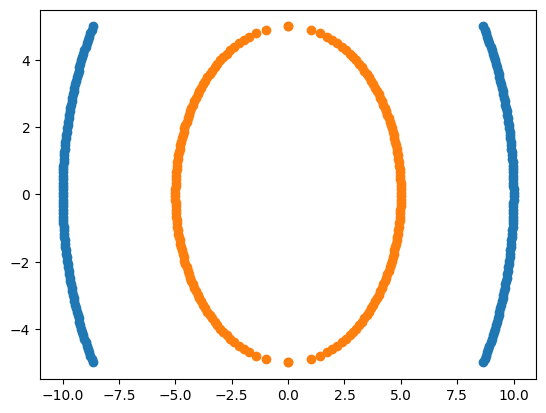

In [95]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [96]:
y1.shape

(200,)

In [97]:
y.shape

(200,)

In [98]:
np.vstack([y,x]).shape

(2, 200)

In [99]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [100]:

import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1,df2])
df.head(5)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [101]:
df.tail(5)

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [102]:
### Independent and Dependent features
X=df.iloc[:,:2]
y=df.Y

In [103]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [104]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [110]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

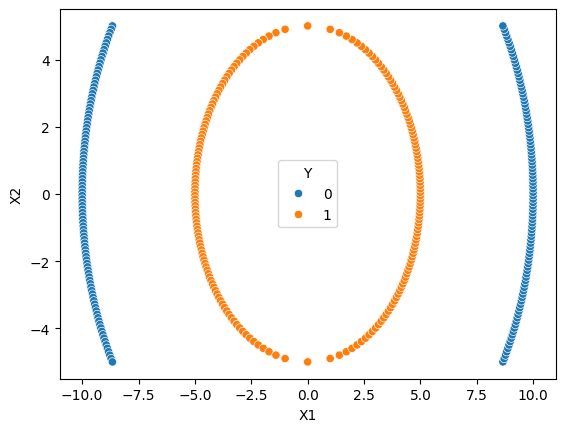

In [112]:
sns.scatterplot(data=df,x=df['X1'],y=df['X2'],hue=y)

In [113]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [114]:
y_train

50     1
63     0
112    1
159    0
83     1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

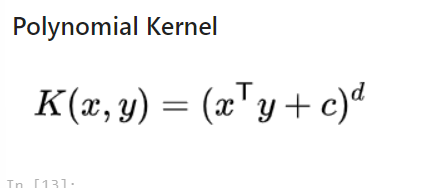

In [115]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.59

In [117]:
# We need to find components for the Polynomical Kernel
# X1,X2,X1_sqaure,X2_square,X1*X2
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [118]:
#### Independent and Dependent features
X=df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y=df['Y']

In [119]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [121]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [122]:
import plotly.express as px

In [123]:
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [124]:
fig=px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [127]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [128]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0